# Boxplot of model fit metrics 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns


In [116]:
# list of models
# Commented few models because they produced very big results which interfere visualization
models = [
          'ExtraTreesRegressor',
        'ExtraTreeRegressor',
        'RandomForestRegressor',
          'BaggingRegressor',
          'DecisionTreeRegressor',
                   'MLPRegressor',
          
          
#           'GaussianProcessRegressor',
          'GradientBoostingRegressor',
          'HuberRegressor',
    'TheilSenRegressor',
    'AdaBoostRegressor',
          'KNeighborsRegressor',
       'DummyRegressor'

          #'PassiveAggressiveRegressor',
          #'RANSACRegressor',
          #'SGDRegressor',
          
    
  
         ]
buildingtypes = ['Office', 'PrimClass', 'UnivClass', 'UnivDorm', 'UnivLab']

In [117]:
data = pd.read_csv('../results/AdaBoostRegressor_metrics_cross_validation_1.csv')

In [118]:
#data.building.str.contains("Office")

In [119]:
def assign_buildingtype(name):
    if "Office" in name:
        return "Office"
    elif "PrimClass" in name:
        return "PrimClass"
    elif "UnivClass" in name:
        return "UnivClass"
    elif "UnivDorm" in name:
        return "UnivDorm"
    else:
        return "UnivLab"

In [120]:
data['buildingtype'] = data.building.apply(lambda x: assign_buildingtype(x))
data['cv_mode'] = str(1)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 7 columns):
building        482 non-null object
MAPE            482 non-null float64
NMBE            482 non-null float64
CVRSME          482 non-null float64
RSQUARED        482 non-null float64
buildingtype    482 non-null object
cv_mode         482 non-null object
dtypes: float64(4), object(3)
memory usage: 26.4+ KB


In [122]:
data.melt(id_vars=['buildingtype','cv_mode'], value_vars='MAPE').head()

,buildingtype,cv_mode,variable,value
0,UnivLab,1,MAPE,15.213087
1,UnivLab,1,MAPE,9.538444
2,UnivLab,1,MAPE,10.443308
3,UnivLab,1,MAPE,10.609274
4,UnivLab,1,MAPE,21.976626


In [123]:
# for value in range(1,5):
#     print(value)

In [124]:
#MAPE['RandomForestRegressor']

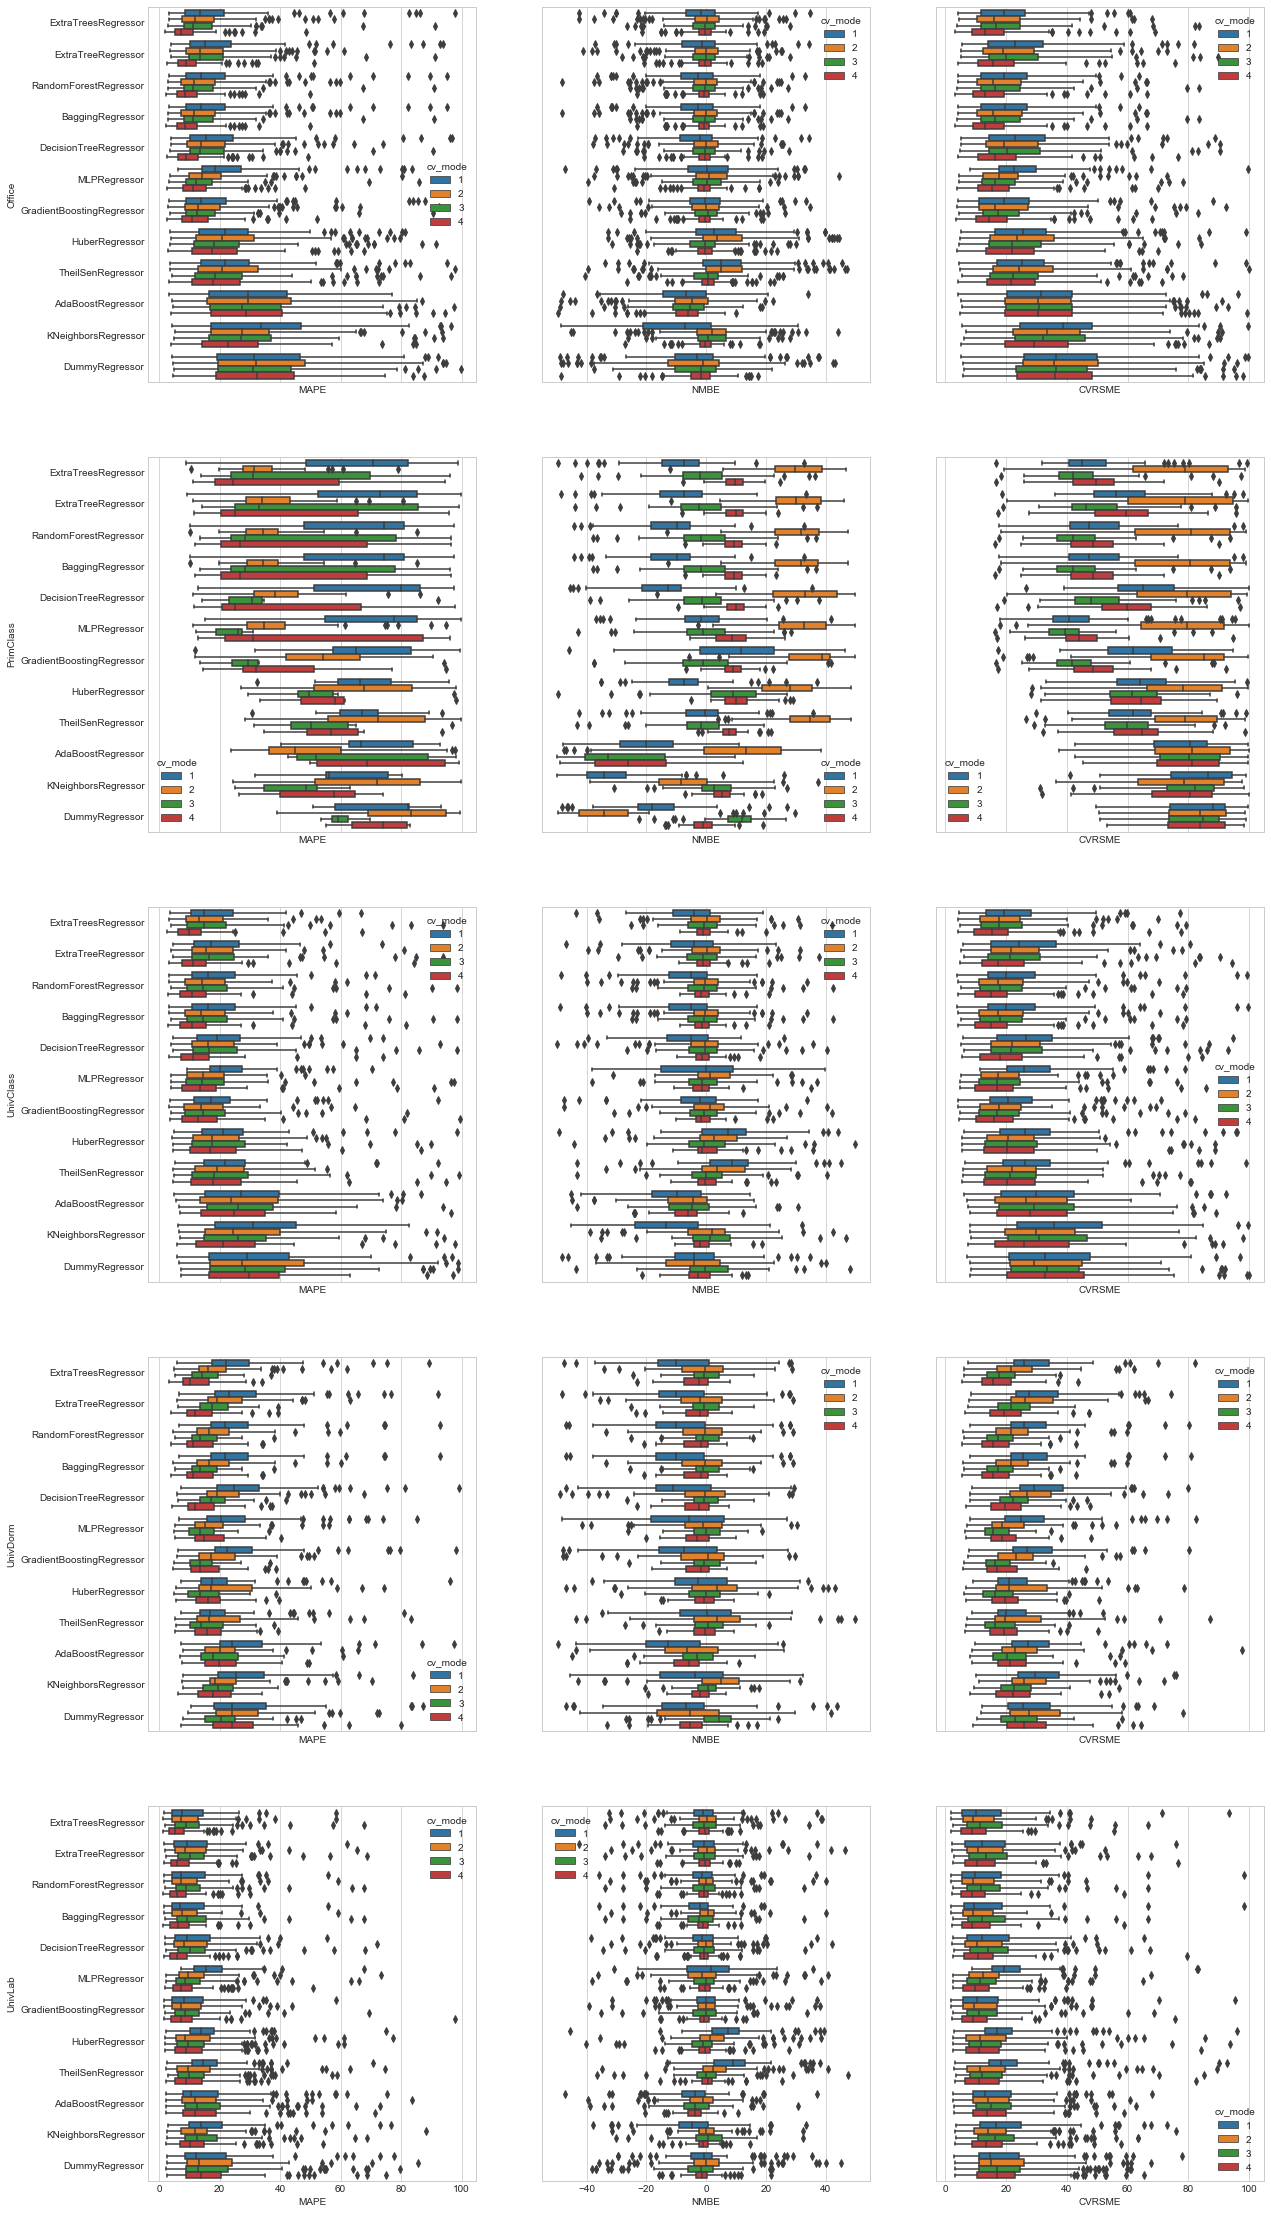

In [125]:
f, axes = plt.subplots(5, 3, figsize=(20,40), sharex='col')
plt.style.use('seaborn-whitegrid')

for buildingtype in buildingtypes:
        # Draw lines on single plot
#         MAPE = {}
#         NMBE = {}
#         CVRSME = {}
    dataframes = []
    for i in range(len(models)):

        cv_range = range(1,5)

        for cv_mode in cv_range:


            data = pd.read_csv('../results/' + models[i] + '_metrics_cross_validation_'+str(cv_mode)+'.csv')
            #data = data.drop(columns=['Unnamed: 0'])
    #                 data['buidingtype'] = buildingtype
            data['buildingtype'] = data.building.apply(lambda x: assign_buildingtype(x))
            data['cv_mode'] = str(cv_mode)
            data['model'] = models[i]
            dataframes.append(data)
            result = pd.concat(dataframes)

    #             MAPE[models[i]] =  result[result['buidingtype']==buildingtype]['MAPE']
    #             NMBE[models[i]] =  result[result['buidingtype']==buildingtype]['NMBE']
    #             CVRSME[models[i]] =  result[result['buidingtype']==buildingtype]['CVRSME']
    MAPE = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='MAPE')
    #         MAPE_df = pd.DataFrame(MAPE)
    #         MAPE_df = MAPE_df[MAPE_df<100].melt()
    ax1 = sns.boxplot(data=MAPE[MAPE.buildingtype == buildingtype][MAPE<100], x='value', y='model', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),0])
    ax1.set(ylabel=buildingtype, xlabel="MAPE")

    NMBE = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='NMBE')
    #         NMBE_df = pd.DataFrame(NMBE)
    #         NMBE_df = NMBE_df[NMBE_df>-50].melt() #[NMBE_df<100]
    # ax2 = sns.boxplot(data=NMBE, x='value', y='variable', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),1])
    # ax2.set(ylabel="", xlabel="NMBE", yticks=[])
    ax2 = sns.boxplot(data=NMBE[NMBE.buildingtype == buildingtype][(NMBE<50)&(NMBE>-50)], x='value', y='model', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),1])
    ax2.set(ylabel="", xlabel="NMBE", yticks=[])

    CVRSME = result.melt(id_vars=['buildingtype','cv_mode','model'], value_vars='CVRSME')
    #         CVRSME_df = pd.DataFrame(CVRSME)
    #         CVRSME_df = CVRSME_df[CVRSME_df<100].melt() #[NMBE_df<100]
    # ax3 = sns.boxplot(data=CVRSME, x='value', y='variable', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),2])
    # ax3.set(ylabel="", xlabel="CVRSME", yticks=[])
    ax3 = sns.boxplot(data=CVRSME[CVRSME.buildingtype == buildingtype][(CVRSME<100)], x='value', y='model', hue='cv_mode', ax=axes[buildingtypes.index(buildingtype),2])
    ax3.set(ylabel="", xlabel="CVRSME", yticks=[])

    #             sns.boxplot(y="b", x= "a", data=rows,  orient='v' ) #, ax=axes[0]
    #             print(rows)
        # Single line creator
    #             value, = plt.plot(rows, styles[i], label=models[i])

    # sns.boxplot(y="b", x= "a", data=df,  orient='v' , ax=axes[0])
    # sns.boxplot(y="c", x= "a", data=df,  orient='v' , ax=axes[1])